In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving global_warming_dataset.csv to global_warming_dataset.csv


In [6]:
data = pd.read_csv(io.BytesIO(uploaded['global_warming_dataset.csv']))
# Convert 'Year' to datetime format for time-series modeling
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)


In [7]:
data_country = data[data['Country'] == "Country_27"]

In [9]:
### Time-Series Forecasting (Temperature Anomaly) ###
# Selecting target variable for forecasting
temp_anomaly = data_country[['Temperature_Anomaly']]


In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(temp_anomaly.dropna())

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("The series is stationary (no differencing needed).")
else:
    print("The series is non-stationary (differencing required).")


ADF Statistic: -22.253535221648498
p-value: 0.0
The series is stationary (no differencing needed).


In [ ]:
# Train ARIMA model
arima_model = ARIMA(temp_anomaly, order=(5,1,0))
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [23]:
# Forecast next 10 years
forecast_years = 10
forecast = arima_result.forecast(steps=forecast_years)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<ipython-input-28-1fa0bc1994c2>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=temp_anomaly.index[-1], periods=forecast_years+1, freq='Y')[1:]
<ipython-input-28-1fa0bc1994c2>:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=temp_anomaly.index[-1], periods=forecast_years+1, freq='Y')[1:], forecast, label='Forecast', linestyle='dashed')


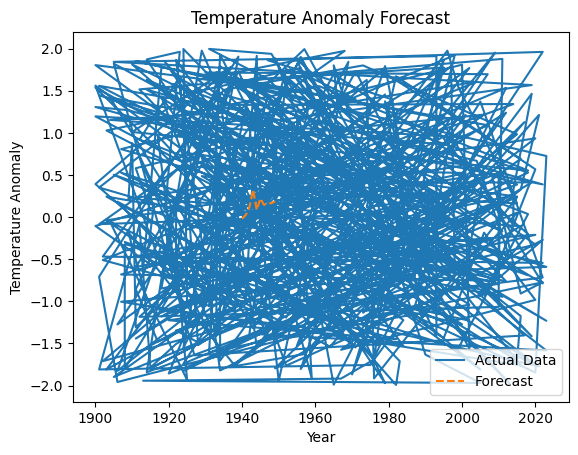

In [28]:
# Plot results
# Smooth actual data using a rolling mean (optional, set window size)
temp_anomaly_smoothed = temp_anomaly.rolling(window=5, min_periods=1).mean()

# Plot forecast with a bold dashed line and markers
forecast_index = pd.date_range(start=temp_anomaly.index[-1], periods=forecast_years+1, freq='Y')[1:]

plt.plot(temp_anomaly, label='Actual Data')
plt.plot(pd.date_range(start=temp_anomaly.index[-1], periods=forecast_years+1, freq='Y')[1:], forecast, label='Forecast', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.title('Temperature Anomaly Forecast')
plt.show()


In [25]:
### Machine Learning Model (CO2 Emissions Prediction) ###
# Define features and target variable
features = ['Population', 'GDP', 'Renewable_Energy_Usage', 'Methane_Emissions', 'Industrial_Activity',
            'Air_Pollution_Index', 'Biodiversity_Index', 'Ocean_Acidification', 'Fossil_Fuel_Usage',
            'Energy_Consumption_Per_Capita', 'Policy_Score', 'Average_Temperature']
target = 'CO2_Emissions'

# Drop rows with missing values
data = data.dropna()

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [19]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=5, random_state=42)

rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")


Mean Squared Error: 83082215883647616.0000
R-Squared: -0.0008


In [27]:
### Correlation Between Extreme Weather Events & Global Warming ###
weather_features = ['Temperature_Anomaly', 'CO2_Emissions', 'Sea_Level_Rise', 'Air_Pollution_Index']
X_weather = data[weather_features]
Y_extreme_events = data['Extreme_Weather_Events']  # Assuming this column exists

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_weather, Y_extreme_events, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_w, y_train_w)
y_pred_w = rf_classifier.predict(X_test_w)
accuracy = accuracy_score(y_test_w, y_pred_w)
print(f"Extreme Weather Event Classification Accuracy: {accuracy:.4f}")

Extreme Weather Event Classification Accuracy: 0.0202


In [39]:
### Anomaly Detection in CO2 Emissions & Weather Patterns ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['CO2_Emissions', 'Air_Pollution_Index', 'Temperature_Anomaly']])
dbscan = DBSCAN(eps=0.005, min_samples=1).fit(X_scaled)
data['Anomaly_Label'] = dbscan.labels_
print(f"Anomaly Detection Complete.")


Anomaly Detection Complete.


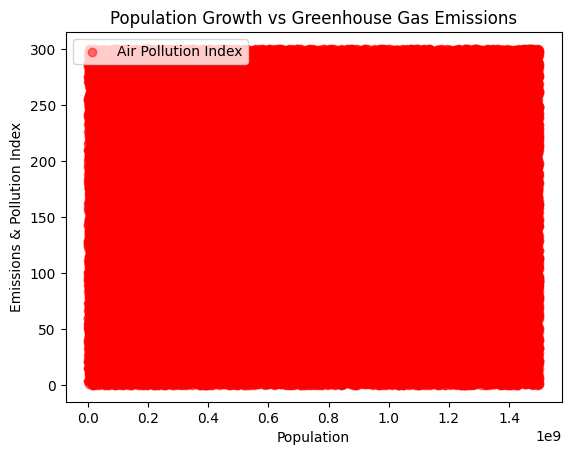

In [40]:
### Population Growth & Greenhouse Gas Emissions ###
# plt.scatter(data['Population'], data['CO2_Emissions'], label='CO2 Emissions', alpha=0.5)
plt.scatter(data['Population'], data['Air_Pollution_Index'], label='Air Pollution Index', alpha=0.5, color='red')
plt.xlabel('Population')
plt.ylabel('Emissions & Pollution Index')
plt.legend()
plt.title('Population Growth vs Greenhouse Gas Emissions')
plt.show()
